# Explore here

In [21]:
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [50]:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd


auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

artist_id = "6l3HvQ5sa6mXTsMTB19rO5"
response = sp.artist_top_tracks(artist_id, country='US')

tracks=[]
for track in response['tracks']:
    tracks.append({
        'name': track['name'],
        'popularity' : track['popularity'],
        'album': track['album']['name'],
        'duration' : track['duration_ms']
    })

    #print(tracks)


tracks_df = pd.DataFrame(tracks)
tracks_df = tracks_df.sort_values(by='popularity', ascending=False)

print(tracks_df.head(10))

    



                                      name  popularity  \
0                           No Role Modelz          90   
1     First Person Shooter (feat. J. Cole)          88   
2                               Wet Dreamz          85   
3                                 Work Out          85   
4                             MIDDLE CHILD          83   
5                Power Trip (feat. Miguel)          83   
7  m y . l i f e (with 21 Savage & Morray)          79   
8                               Love Yourz          79   
9  She Knows (feat. Amber Coffman & Cults)          77   
6              All My Life (feat. J. Cole)          74   

                            album  duration  
0         2014 Forest Hills Drive    292799  
1                For All The Dogs    247444  
2         2014 Forest Hills Drive    239266  
3  Cole World: The Sideline Story    235320  
4                    MIDDLE CHILD    213593  
5    Born Sinner (Deluxe Version)    241160  
7                  The Off-Season    21

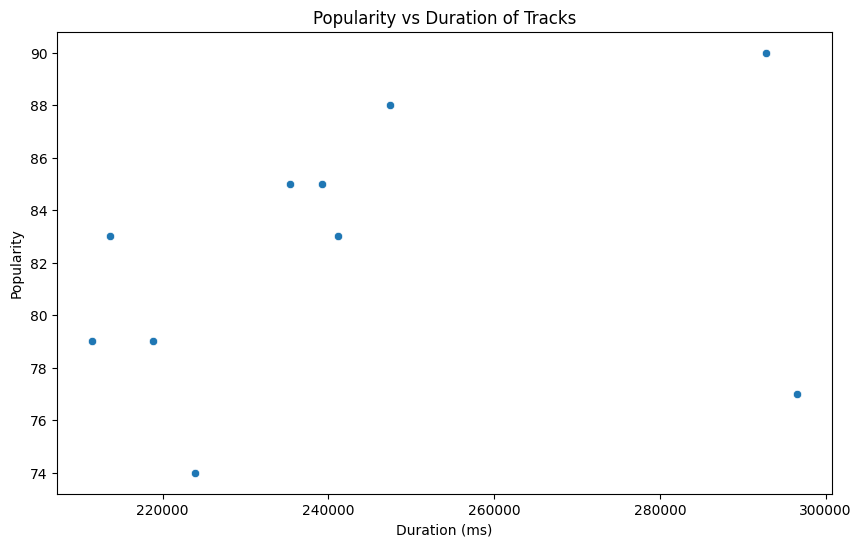

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(data=tracks_df, x='duration', y='popularity')

plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Popularity vs Duration of Tracks')

plt.show()

